In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

from itertools import cycle
cycol = cycle('bgrcmk')


In [39]:
dets = np.random.rand(3, 5) + [0,0,1,1,0]
dets /= 2

(3,) [ 2.48964781  2.45659948  1.53867802]
[2 1 0]


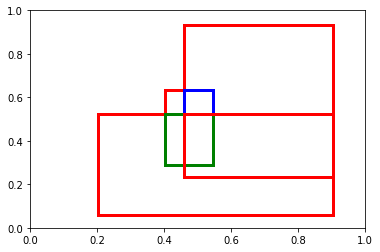

[2, 1, 0]

In [40]:

def py_cpu_nms(dets, thresh):
    """Pure Python NMS baseline."""
    
    for i in range(dets.shape[0]):
        a,b,c,d,e = dets[i]
        plt.gca().add_patch(
                    plt.Rectangle((a,b),c - a,d - b, facecolor = 'green', fill = False,
                                  edgecolor='r', linewidth=3)
                    )
    x1 = dets[:, 0]
    y1 = dets[:, 1]
    x2 = dets[:, 2]
    y2 = dets[:, 3]
    scores = dets[:, 4]

    areas = (x2 - x1 + 1) * (y2 - y1 + 1) # n x 1
    print areas.shape, areas
    order = scores.argsort()[::-1] # n x 1
    print order

    keep = []
    while order.size > 0:
        i = order[0]
        keep.append(i)
        
        # 以置信度最高的 x_bottom_left 为标准，找不小于它的
        xx1 = np.maximum(x1[i], x1[order[1:]])
        
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])
        
        for i in range(len(xx1)):
            plt.gca().add_patch(
                    plt.Rectangle((xx1[i],yy1[i]),xx2[i] - xx1[i],yy2[i]- yy1[i], facecolor = 'black', fill = False,
                                  edgecolor=cycol.next(), linewidth=3)
                    )
        # 计算置信度最大的矩形与其它矩形相交的面积
        w = np.maximum(0.0, xx2 - xx1 + 1) 
        h = np.maximum(0.0, yy2 - yy1 + 1)
        inter = w * h
        
        # 计算 Intersection over Union(IoU)
        ovr = inter / (areas[i] + areas[order[1:]] - inter)
        
        # 获得 从 order[1] 开始的所有满足条件的矩形的下标
        inds = np.where(ovr <= thresh)[0]
        
        # 因为 order[0] 已经包含在 keep 里面了，所以 inds 要做一个向右的 1 的偏移。
        order = order[inds + 1]

        
    plt.show()
    return keep


py_cpu_nms(dets, 1)

